In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
#some-helperfunction for data cleanning.
def convert_currency(value):
    new_value = value.replace('M', '').replace('k','')
    return np.float(new_value)
def convert_currency2(value):
    new_value = value.replace('$', '')
    return np.float(new_value)
def convert_currency3(value):
    return np.float(value)/(1024*1024)

In [84]:
apple=pd.read_csv("/data-explor/data/external/AppleStore.csv",index_col=0)
google=pd.read_csv("/data-explor/data/external/googleplaystore.csv")


In [101]:
#Remove unnecessary attributes and re-sort the columns
apple_game=apple.loc[apple['prime_genre']== 'Games']
google_game=google.loc[google['Category']=='GAME']
google_game=google_game[~google_game['Size'].isin(['Varies with device'])]
google_game=google_game.drop(['Reviews','Installs','Type','Content Rating','Last Updated','Current Ver','Android Ver','Genres'],axis=1)
apple_game=apple_game.drop(['id','ver','currency','rating_count_tot','rating_count_ver','user_rating_ver','cont_rating','sup_devices.num','ipadSc_urls.num','lang.num','vpp_lic'],axis=1)
apple_game.columns=['App','Size','Price','Rating','Category']
apple_game=apple_game[['App','Category','Rating','Size','Price']]
google_game['Size']=google_game['Size'].apply(convert_currency)
apple_game['Size']=apple_game['Size'].apply(convert_currency3)


In [118]:
apple_game.head(5)

,App,Category,Rating,Size,Price
1,PAC-MAN Premium,Games,4.0,96.119141,3.99
6,Shanghai Mahjong,Games,4.0,9.999955,0.99
10,Ms. PAC-MAN,Games,4.0,66.779297,3.99
11,Solitaire by MobilityWare,Games,4.5,47.320312,4.99
12,SCRABBLE Premium,Games,3.5,217.005859,7.99


In [119]:
google_game.head(5)

,App,Category,Rating,Size,Price
1653,ROBLOX,GAME,4.5,67.0,0.0
1654,Subway Surfers,GAME,4.5,76.0,0.0
1655,Candy Crush Saga,GAME,4.4,74.0,0.0
1656,Solitaire,GAME,4.7,23.0,0.0
1657,Bubble Shooter,GAME,4.5,46.0,0.0


In [102]:
#merge the applestore_game and google_game,process the data
game_app = [apple_game, google_game]
ds = pd.concat(game_app)
ds.dropna(axis=0, how='any', inplace=True)
ds = ds.drop_duplicates()
ds['Price']=ds['Price'].astype(float)

In [103]:
#create a new label for free game and non-free

In [122]:
ds['paid']=ds['Price'].apply(lambda x:1 if x>0 else 0)

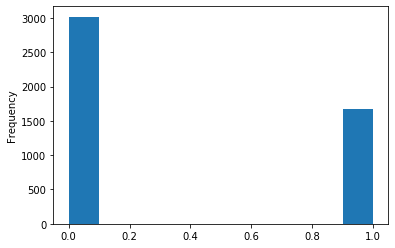

In [105]:
ds['paid'].plot(kind='hist')
#through the graph, we can know ,the free game nearly 40% more than paid game.

In [106]:
ds.Price.value_counts()

0.00     3018
0.99      455
2.99      326
1.99      286
4.99      240
6.99      139
3.99      123
9.99       35
5.99       19
7.99       15
14.99      13
17.99       3
8.99        3
16.99       2
11.99       2
15.99       2
13.99       2
19.99       2
4.49        2
12.99       2
1.61        1
29.99       1
3.49        1
24.99       1
20.99       1
2.49        1
14.00       1
1.49        1
Name: Price, dtype: int64

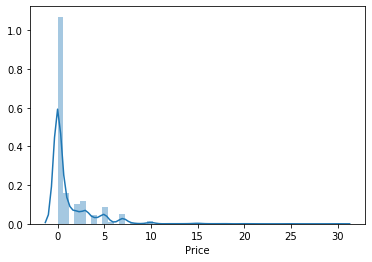

In [107]:
sns.distplot(ds['Price'])
#According to the histogram, we can see that the price range of this paid game is mainly between 0-10 US dollars

In [126]:
#Explore the relationship between software ratings and price and size
index=['Rating','Price','Size']
my_matrix=ds[index].corr()

In [127]:
print(my_matrix)

          Rating     Price      Size
Rating  1.000000  0.041168 -0.006042
Price   0.041168  1.000000  0.495931
Size   -0.006042  0.495931  1.000000


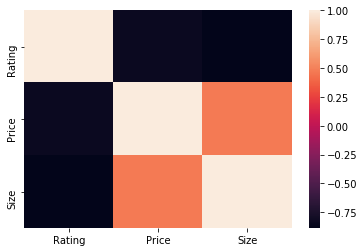

In [117]:
sns.heatmap(my_matrix.corr())

In [ ]:
#according to the map, the relationship between game Rating and price is not strong, 
#and the Rating is not positively correlated with game size,but The size of the game is positively related to the price

In [134]:
#lets remove free app,only focus on rating ,price and size of paid game.
ds=ds.loc[ds['paid']== 1]
ds.head(1000)

,App,Category,Rating,Size,Price,paid


In [131]:
index=['Rating','Price','Size']
my_matrix=ds[index].corr()
my_matrix

,Rating,Price,Size
Rating,1.000000,-0.037339,-0.098831
Price,-0.037339,1.000000,0.500595
Size,-0.098831,0.500595,1.000000


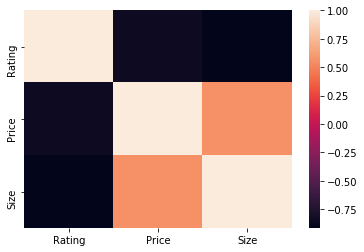

In [132]:
sns.heatmap(my_matrix.corr())